In [32]:
# import  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
file_path = 'data_files/imdb_top_1000.csv'

# Load the dataset
df = pd.read_csv(file_path)

print("Data loaded successfully!")
print(df.head())

Data loaded successfully!
                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   


In [34]:
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [35]:
#count of missing values for each column.
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [36]:
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')
df['IMDB_Rating'] = pd.to_numeric(df['IMDB_Rating'], errors='coerce')

# fill with median
gross_median = df['Gross'].median()
df['Gross'].fillna(gross_median, inplace=True)

metascore_median = df['Meta_score'].median()
df['Meta_score'].fillna(metascore_median, inplace=True)

# confirm
print("\nMissing values after cleaning:")
print(df.isnull().sum())



Missing values after cleaning:
Poster_Link         0
Series_Title        0
Released_Year       0
Certificate       101
Runtime             0
Genre               0
IMDB_Rating         0
Overview            0
Meta_score          0
Director            0
Star1               0
Star2               0
Star3               0
Star4               0
No_of_Votes         0
Gross            1000
dtype: int64


C:\Users\New\AppData\Local\Temp\ipykernel_16068\3027518907.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gross'].fillna(gross_median, inplace=True)
C:\Users\New\AppData\Local\Temp\ipykernel_16068\3027518907.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [37]:
# Now, let's rename those clunky columns for easier access.
df.rename(columns={
    'Gross': 'Revenue'
}, inplace=True)

# Let's check for any duplicate rows. We don't want to count the same movie twice.
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")
# Result is 0, which is great. No duplicates to remove.

# Final check on the cleaned column names.
print("\nColumns after renaming:")
print(df.columns)


Number of duplicate rows: 0

Columns after renaming:
Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Revenue'],
      dtype='object')


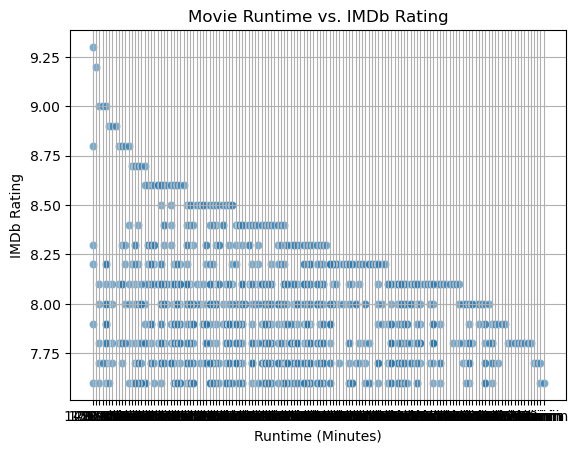

In [38]:
# create scatter plot.
# plt.figure(figsize=(15, 9))
sns.scatterplot(x='Runtime', y='IMDB_Rating', data=df, alpha=0.6)
plt.title('Movie Runtime vs. IMDb Rating')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('IMDb Rating')
plt.grid(True)
# plt.savefig('runtime_vs_rating.png') # Save the plot for the README
plt.show()

In [40]:
# A visual inspection suggests a very slight positive trend, but it's not strong.
# Let's calculate the correlation coefficient to confirm this numerically.
correlation = df['Runtime'].corr(df['IMDB_Rating'])
print(f"Correlation between Runtime and Rating: {correlation:.2f}")

ValueError: could not convert string to float: '142 min'

C:\Users\New\AppData\Local\Temp\ipykernel_16068\2702366215.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_ratings.index, x=genre_ratings.values, orient='h', palette='mako')


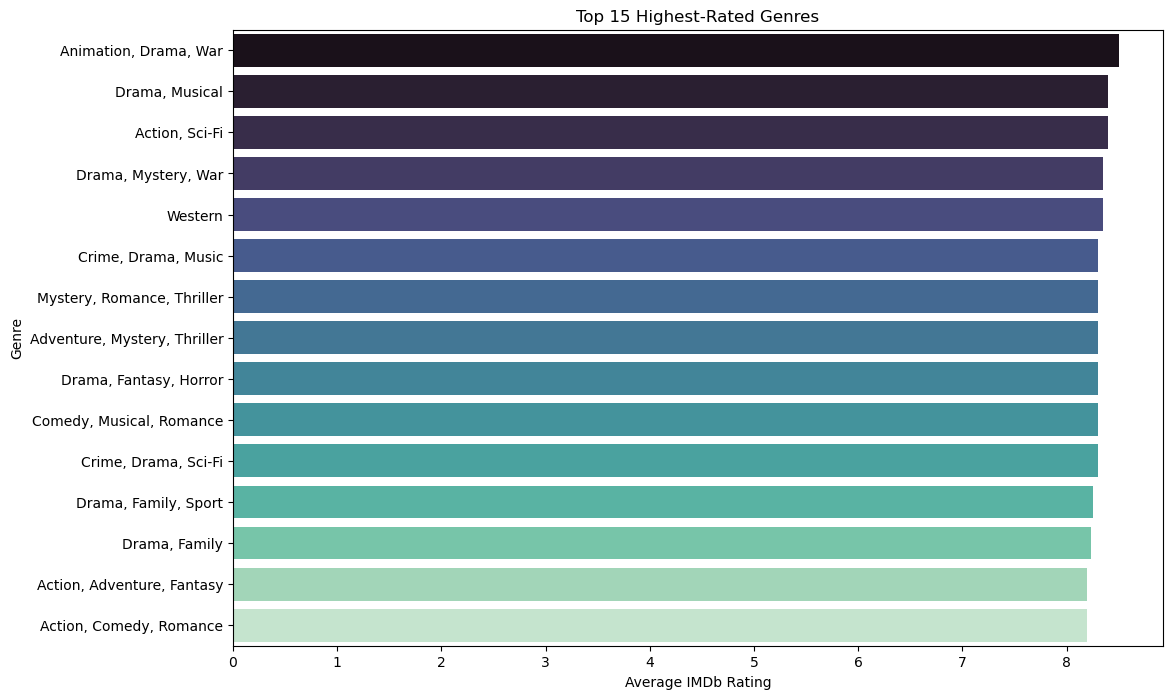

In [46]:
# Let's group by the full genre string and find the average rating.
genre_ratings = df.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y=genre_ratings.index, x=genre_ratings.values, orient='h', palette='mako')
plt.title('Top 15 Highest-Rated Genres')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Genre')
# plt.savefig('top_genres.png')
plt.show()

# 